# Tarea 2 Redes Neuronales Artificiales
Andrea Figueroa

Alejandro Sazo

# Pregunta 3

In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
from keras.utils import np_utils
from keras.models import Sequential, Model
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D, AveragePooling2D
from keras.optimizers import SGD, Adadelta, Adagrad
from keras.models import load_model
from random import randint
np.set_printoptions(precision=5, suppress=True)

Using Theano backend.


## a)

Tamaño imágenes:  32 x 32
Número de clases: 10
Número de ejemplos de test: 26032
Número de ejemplos de entrenamiento: 73257
Set de Test:


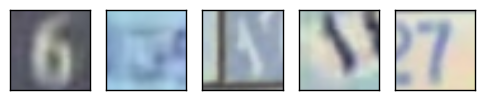

Set de Entrenamiento:


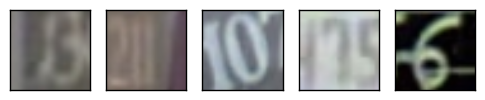

In [2]:
train_data = sio.loadmat('train_32x32.mat')
test_data = sio.loadmat('test_32x32.mat')

# Cargar set de entrenamiento
X_train = train_data['X'].T
y_train = train_data['y'] - 1

# Cargar set de test
X_test = test_data['X'].T
y_test = test_data['y'] - 1

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Número de clases
n_classes = len(np.unique(y_train))

# Número de ejemplos
n_train = len(X_train)
n_test = len(X_test)

print "Tamaño imágenes: " , np.shape(X_train[0])[1], "x", np.shape(X_train[0])[2]
print "Número de clases:" , n_classes
print "Número de ejemplos de test:" , n_test
print "Número de ejemplos de entrenamiento:" , n_train

# Número de imágenes a mostrar
n_im = 5

print "Set de Test:"

# Se eligen n elementos al azar
index = random.sample(X_test, n_im)

for i in range(0,len(index)):      
    ax = plt.subplot(1, n_im, 1+i)
    im = index[i].reshape(3,32,32).transpose(2,1,0)
    plt.imshow(im)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False) 
    
plt.show()
    
print "Set de Entrenamiento:"

# Se eligen n elementos al azar
index = random.sample(X_train, n_im)

for i in range(0,len(index)):      
    ax = plt.subplot(2, n_im, 1+i)
    im = index[i].reshape(3,32,32).transpose(2,1,0)
    plt.imshow(im)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False) 
        
plt.show()

Se trabajará con SVHN o Street View House Numbers, se puede observar que las imágenes con las que se trabajará, efectivamente pertenecen a un set de números de casas, donde en cada imágen se espera visualizar un número, es por ésto que el número de clases posibles es 10, ya que corresponden a los números de 0 a 9.

## b)

In [3]:
# Normalizar imágenes
X_train /= 255
X_test /= 255

Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)

## c)

In [4]:
(n_channels, n_rows, n_cols) = np.shape(X_train[0])

model = Sequential()
model.add(Convolution2D(16, 5, 5, border_mode='same', activation='relu',
            input_shape=(n_channels, n_rows, n_cols)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(512, 7, 7, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(20, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_1 (Convolution2D)  (None, 16, 32, 32)    1216        convolution2d_input_1[0][0]      
____________________________________________________________________________________________________
maxpooling2d_1 (MaxPooling2D)    (None, 16, 16, 16)    0           convolution2d_1[0][0]            
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 512, 16, 16)   401920      maxpooling2d_1[0][0]             
____________________________________________________________________________________________________
maxpooling2d_2 (MaxPooling2D)    (None, 512, 8, 8)     0           convolution2d_2[0][0]            
___________________________________________________________________________________________

Se puede observar como cambia la dimensionalidad de la imágen al entrar a la red, con una imágen inicial de 32x32 se reduce a 16x16 y luego a 8x8, después de eso se pasa a un arreglo unidimensional y el output es de 10, lo que indica a que clase pertenece con mayor probabilidad.

## d)

```python

model.compile(loss='binary_crossentropy', optimizer="adagrad", metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=1280, nb_epoch=12, verbose=1, validation_data=(X_test, Y_test))

# Esto se hizo en el servidor con GPU

```

In [5]:
# Se carga el output obtenido para mostrarlo
text_file = open('output_3d', 'r')

output = text_file.read()

print output

Train on 73257 samples, validate on 26032 samples
Epoch 1/12
73257/73257 [==============================] - 35s - loss: 0.3927 - acc: 0.8977 - val_loss: 0.3161 - val_acc: 0.9000
Epoch 2/12
73257/73257 [==============================] - 36s - loss: 0.3165 - acc: 0.9000 - val_loss: 0.3148 - val_acc: 0.9000
Epoch 3/12
73257/73257 [==============================] - 36s - loss: 0.3109 - acc: 0.9004 - val_loss: 0.3073 - val_acc: 0.9011
Epoch 4/12
73257/73257 [==============================] - 36s - loss: 0.2787 - acc: 0.9069 - val_loss: 0.2569 - val_acc: 0.9097
Epoch 5/12
73257/73257 [==============================] - 36s - loss: 0.2136 - acc: 0.9237 - val_loss: 0.2107 - val_acc: 0.9225
Epoch 6/12
73257/73257 [==============================] - 36s - loss: 0.1704 - acc: 0.9375 - val_loss: 0.1641 - val_acc: 0.9406
Epoch 7/12
73257/73257 [==============================] - 36s - loss: 0.1460 - acc: 0.9469 - val_loss: 0.1519 - val_acc: 0.9457
Epoch 8/12
73257/73257 [==============================

Se puede observar que se alcanza un accuracy de 96,72% lo que supera el valor reportado en la literatura de 94,28%

## e)

In [7]:
def generate_model(cf_size, cp_size):
    model = Sequential()
    model.add(Convolution2D(16,cf_size,cf_size, border_mode='same',activation='relu',input_shape=(n_channels, n_rows, n_cols)))
    model.add(MaxPooling2D(pool_size=(cp_size,cp_size)))
    model.add(Convolution2D(512,cf_size,cf_size, border_mode='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(cp_size,cp_size)))
    model.add(Flatten())
    model.add(Dense(20, activation='relu'))
    model.add(Dense(n_classes, activation='softmax'))

    return model

# Tamaño capas convolucionales
cf_size = [3,5,7,9]
# Tamaño capas de pooling
cp_size = [2,4]

for i in cf_size:
    for j in cp_size:
        model = generate_model(i,j)
        #print "Modelo con tamaño capa convolucional: ", i, " y tamaño capa de pooling: ", j
        #model.summary()

Dimensiones

|Tamaño Capa Convolucional|Tamaño Capa de Pooling|conv1|pool1|conv2|pool2|flatten|
|:--:|:--:|:--:|:--:|:--:|:--:|:--:|
|3|2|(16,32,32)|(16,16,16)|(512,16,16)|(512,8,8)|(32768)|
|3|4|(16,32,32)|(16,8,8)|(512,8,8)|(512,2,2)|(2048)|
|5|2|(16,32,32)|(16,16,16)|(512,16,16)|(512,8,8)|(32768)|
|5|4|(16,32,32)|(16,8,8)|(512,8,8)|(512,2,2)|(2048)|
|7|2|(16,32,32)|(16,16,16)|(512,16,16)|(512,8,8)|(32768)|
|7|4|(16,32,32)|(16,8,8)|(512,8,8)|(512,2,2)|(2048)|
|9|2|(16,32,32)|(16,16,16)|(512,16,16)|(512,8,8)|(32768)|
|9|4|(16,32,32)|(16,8,8)|(512,8,8)|(512,2,2)|(2048)|


Se puede observar que lo que afecta los cambios de dimensionalidad es solo el tamaño de la capa de Pooling, donde el tamaño de capa de pooling de 4 disminuye mucho más las dimensionalidades

```python

# Tamaño capas convolucionales
cf_size = [3,5,7,9]
# Tamaño capas de pooling
cp_size = [2,4]

for i in cf_size:
    for j in cp_size:
        print "Modelo con tamaño capa convolucional: ", i, " y tamaño capa de pooling: ", j
        model = generate_model(i,j)
        model.compile(loss='binary_crossentropy', optimizer='adagrad', metrics=['accuracy'])
        model.fit(X_train, Y_train, batch_size=1280, nb_epoch=10, verbose=1, validation_data=(X_test, Y_test))

# Ejecutado en servidor con  GPU

```

In [9]:
# Se carga el output obtenido para mostrarlo
text_file = open('output_3e', 'r')

output = text_file.read()

#print output

|Tamaño Capa Convolucional|Tamaño Capa de Pooling|loss|accuracy|Tiempo epoch[s]|
|:--------------:|:------------:|:--:|:--:|:--:|
|3|2|0.1270|0.9553|23|
|3|4|0.2107|0.9247|18|
|5|2|0.2075|0.9263|29|
|5|4|0.2194|0.9199|26|
|7|2|2.9574|0.8155|43|
|7|4|0.1893|0.9310|40|
|9|2|2.5781|0.8392|57|
|9|4|0.1894|0.9312|55|


Se puede observar cuando el tamaño de la capa convolucional es 3 o 5, los mejores resultados se obtienen con tamaño de capa de pooling 2, pero para tamaño de capa convolucional 7 y 9, el tamaño de capa de pooling 4 obtiene muchos mejores resultados. En este caso el mejor resultado es el alcanzado por el tamaño de capa convolucional 3 y capa de pooling 2, con un accuracy de 95,53% y loss de 0.1184, lo cual no mejora el resultado obtenido anteriormente, pero si el de la literatura.

Se puede observar además, que al aumentar el tamaño de la capa de pooling se disminuye el tiempo de entrenamiento, pero al aumentar el tamaño de la capa convolucional, el tiempo de entrenamiento aumenta.

## f)

In [10]:
def generate_model_f(n_filters_l1, n_filters_l2):
    
    (n_channels, n_rows, n_cols) = np.shape(X_train[0])

    # Se eligen estos parámetros
    cf_size = 5
    cp_size = 2
    
    model = Sequential()
    model.add(Convolution2D(n_filters_l1,cf_size,cf_size,border_mode='same',activation='relu',
    input_shape=(n_channels, n_rows, n_cols)))
    model.add(MaxPooling2D(pool_size=(cp_size,cp_size)))
    model.add(Convolution2D(n_filters_l2,cf_size,cf_size,border_mode='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(cp_size,cp_size)))
    model.add(Flatten())
    model.add(Dense(20, activation='relu'))
    model.add(Dense(n_classes, activation='softmax'))

    return model

```python
# Valores a probar
n_filters_l1_array = [16,32,64,128]
n_filters_l2_array = [32,64,128,256]

for i in n_filters_l1_array:
    for j in n_filters_l2_array:
        print "Modelo con #filtros capa 1: ", i, " y #filtros capa 2: ", j
        model = generate_model_f(i,j)
        model.compile(loss='binary_crossentropy', optimizer='adagrad', metrics=['accuracy'])
        model.fit(X_train, Y_train, batch_size=1280, nb_epoch=10, verbose=1, validation_data=(X_test, Y_test))
        
# Se corre en el servidor con GPU
```

In [11]:
# Se carga el output obtenido para mostrarlo
text_file = open('output_3f', 'r')

output = text_file.read()

#print output

|Filtros Capa 1|Filtros Capa 2|loss|accuracy|Tiempo epoch [s]|
|:--------------:|:------------:|:------------:|:----------:|:--:|
|16|32|0.1243|0.9573|17|
|16|64|0.1203|0.9583|21|
|16|128|2.5781|0.8392|21|
|16|256|0.1371|0.9510|24|
|32|32|0.1317|0.9541|28|
|32|64|0.2203|0.9241|24|
|32|128|0.2136|0.9209|25|
|32|256|0.1068|0.9646|28|
|64|32|0.1435|0.9488|32|
|64|64|0.1307|0.9528|34|
|64|128|0.1978|0.9303|37|
|64|256|0.1443|0.9490|48|
|128|32|0.1429|0.9502|41|
|128|64|0.1193|0.9583|44|
|128|128|0.3180|0.9000|52|
|128|256|0.2119|0.9271|75|


Se puede observar que al ir aumentando los filtros, ya sea de la capa 1 o la 2, el tiempo aumenta.
No se puede observar una tendencia respecto al cambio de número de filtros y el accuracy o loss, el mejor resultado es el de 32 filtros en la capa 1 y 256 filtros en la capa 2 con un accuracy de 96,46%

## g) 

In [12]:
#Cambio de arquitectura, 2 capas convolucionales seguidas de ua capa de pooling

model = Sequential()
model.add(Convolution2D(32, 3, 3,border_mode='same',activation='relu',input_shape=(3,32,32)))
model.add(Convolution2D(32, 3, 3,activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(256, 3, 3, border_mode='same', activation='relu'))
model.add(Convolution2D(256, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(20, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

```python
model.compile(loss='binary_crossentropy', optimizer='adagrad', metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=1280, nb_epoch=10, verbose=1, validation_data=(X_test, Y_test))
# Se corre en el servidor con GPU
```

In [13]:
# Se carga el output obtenido para mostrarlo
text_file = open('output_3g', 'r')

output = text_file.read()

print output

Train on 73257 samples, validate on 26032 samples
Epoch 1/10
73257/73257 [==============================] - 74s - loss: 0.3387 - acc: 0.8989 - val_loss: 0.3180 - val_acc: 0.9000
Epoch 2/10
73257/73257 [==============================] - 75s - loss: 0.3179 - acc: 0.8995 - val_loss: 0.3157 - val_acc: 0.9000
Epoch 3/10
73257/73257 [==============================] - 75s - loss: 0.3023 - acc: 0.9019 - val_loss: 0.2910 - val_acc: 0.9035
Epoch 4/10
73257/73257 [==============================] - 75s - loss: 0.2912 - acc: 0.9041 - val_loss: 0.2812 - val_acc: 0.9071
Epoch 5/10
73257/73257 [==============================] - 75s - loss: 0.2791 - acc: 0.9081 - val_loss: 0.2670 - val_acc: 0.9108
Epoch 6/10
73257/73257 [==============================] - 75s - loss: 0.2633 - acc: 0.9133 - val_loss: 0.2570 - val_acc: 0.9142
Epoch 7/10
73257/73257 [==============================] - 75s - loss: 0.2580 - acc: 0.9141 - val_loss: 0.2472 - val_acc: 0.9164
Epoch 8/10
73257/73257 [==============================

Se puede observar que al modificar la arquitectura de la red, los tiempos de entrenamiento aumentan casi al doble, pero no se observa una mejora en el desempeño de la red, obteniendo 91,89% de accuracy, lo que es mucho menor que el mejor resultado obtenido hasta ahora.

## h)

In [14]:
import theano
# Modelo sugerido en e
#np.random.seed(1337) # for reproducibility

model = Sequential()

model.add(Convolution2D(16, 5, 5, border_mode='same', input_shape=(n_channels, n_rows, n_cols)))
convout1 = Activation('relu')
model.add(convout1)

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(512, 7, 7, border_mode='same'))
convout2 = Activation('relu')
model.add(convout2)

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(20, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

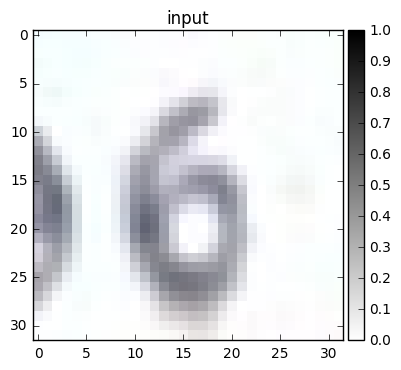

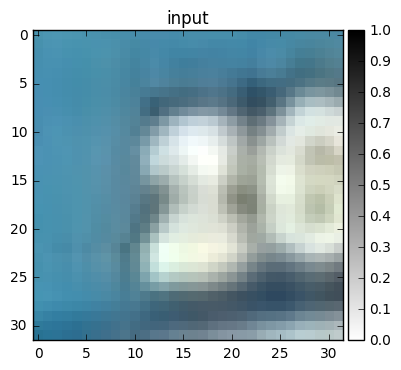

In [15]:
from keras import backend as K
import pylab as pl
import matplotlib.cm as cm

inputs = [K.learning_phase()] + model.inputs

_convout1_f = K.function(inputs, [convout1.output])
def convout1_f(X):
    # The [0] is to disable the training phase flag
    return _convout1_f([0] + [X])

# utility functions
from mpl_toolkits.axes_grid1 import make_axes_locatable

def nice_imshow(ax, data, vmin=None, vmax=None, cmap=None):
    """Wrapper around pl.imshow"""
    if cmap is None:
        cmap = cm.jet
    if vmin is None:
        vmin = data.min()
    if vmax is None:
        vmax = data.max()
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    im = ax.imshow(data, vmin=vmin, vmax=vmax, interpolation='nearest', cmap=cmap)
    pl.colorbar(im, cax=cax)
    
i = 130

# Visualize the first layer of convolutions on an input image
X = X_test[i:i+1]

pl.figure()
pl.title('input')
nice_imshow(pl.gca(), np.squeeze(X.reshape(3,32,32).transpose(2,1,0)), vmin=0, vmax=1, cmap=cm.binary)

plt.show()

X = X_test[i+1:i+2]

pl.figure()
pl.title('input')
nice_imshow(pl.gca(), np.squeeze(X.reshape(3,32,32).transpose(2,1,0)), vmin=0, vmax=1, cmap=cm.binary)

plt.show()

Se visualizan las imágenes de entrenamiento a usar para visualizar los filtros.

In [16]:
import numpy.ma as ma
def make_mosaic(imgs, nrows, ncols, border=1):
    """
    Given a set of images with all the same shape, makes a
    mosaic with nrows and ncols
    """
    nimgs = imgs.shape[0]
    imshape = imgs.shape[1:]
    
    mosaic = ma.masked_all((nrows * imshape[0] + (nrows - 1) * border,
                            ncols * imshape[1] + (ncols - 1) * border),
                            dtype=np.float32)
    
    paddedh = imshape[0] + border
    paddedw = imshape[1] + border
    for i in xrange(nimgs):
        row = int(np.floor(i / ncols))
        col = i % ncols
        
        mosaic[row * paddedh:row * paddedh + imshape[0],
               col * paddedw:col * paddedw + imshape[1]] = imgs[i]
    return mosaic

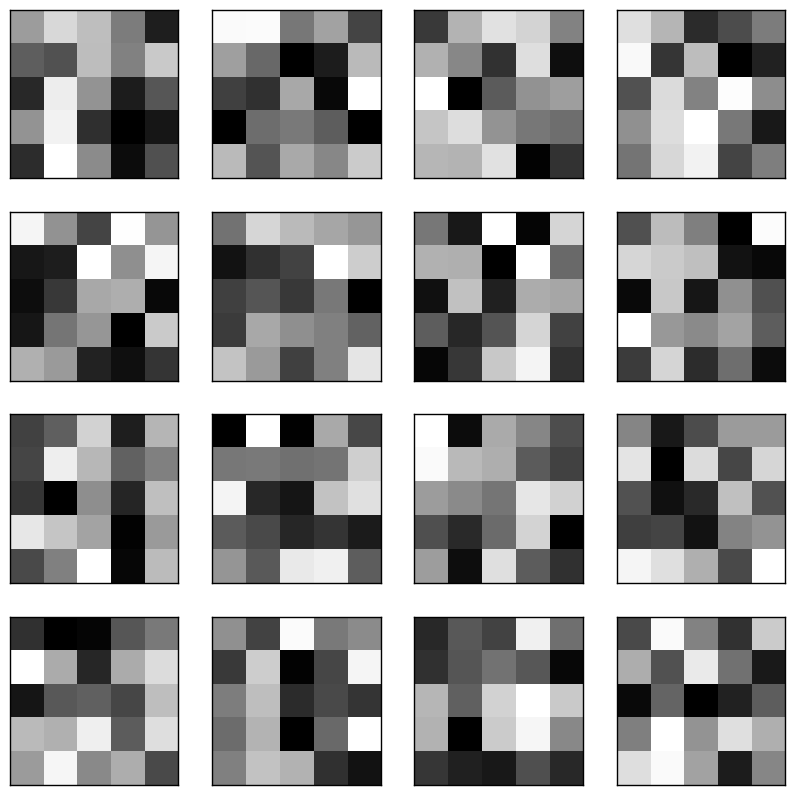

In [17]:
def visualize_weights(W):
    plt.figure(figsize=(10, 10))

    for ind, val in enumerate(W):
        ax = plt.subplot(4, 4, ind+1)
        #print val.shape[:2]
        #im = val.reshape((5,5))
        plt.imshow(val, cmap=cm.binary, interpolation='nearest')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False) 

    plt.show()
    
W = model.layers[0].get_weights()[0]
#W = model.layers[0].W.get_value(borrow=True)
W = np.squeeze(W)
W = W[:,0,:,:]
visualize_weights(W)

Se visualizan los pesos de la red, los cuales no pueden ser interpretados debido a su baja dimensionalidad.

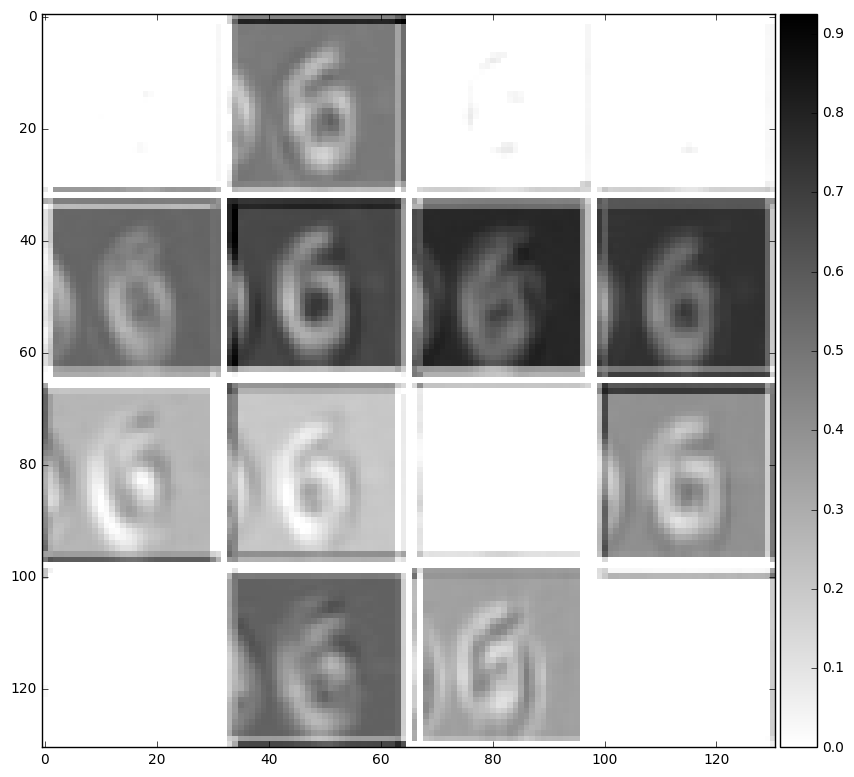

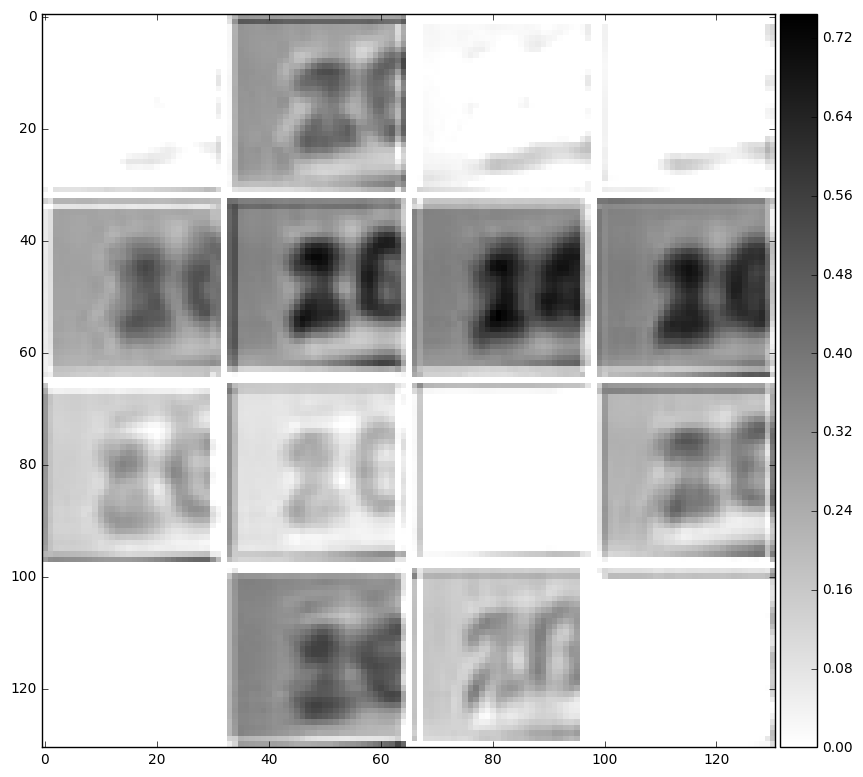

In [18]:
# Visualize convolution result (after activation)

# Visualize the first layer of convolutions on an input image
X = X_test[i:i+1]
C1 = convout1_f(X)
C1 = np.squeeze(C1).transpose(0,2,1)
pl.figure(figsize=(10, 10))
nice_imshow(pl.gca(), make_mosaic(C1, 4, 4), cmap=cm.binary)
plt.show()

X = X_test[i+1:i+2]
C1 = convout1_f(X)
C1 = np.squeeze(C1).transpose(0,2,1)
pl.figure(figsize=(10, 10))
nice_imshow(pl.gca(), make_mosaic(C1, 4, 4), cmap=cm.binary)
plt.show()

Al visualizar los filtros de la primera capa si se puede reconocer que algunos intentan visualizar bordes y quizas formas, sombras, entre otros. Pero son interpretables.

## i)

In [19]:
# Modelo utilizando Dropout
model = Sequential()
model.add(Convolution2D(32, 3, 3,border_mode='same',activation='relu',input_shape=(3,32,32)))
model.add(Convolution2D(32, 3, 3,activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(256, 3, 3, border_mode='same', activation='relu'))
model.add(Convolution2D(256, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(20, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)

```python
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
batch_size = 1280
n_epoch = 20
model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=n_epoch, verbose=1, validation_data=(X_test, Y_test))
# Se corre en el servidor con GPU
```

In [20]:
# Se carga el output obtenido para mostrarlo
text_file = open('output_3i', 'r')

output = text_file.read()

print output

Train on 73257 samples, validate on 26032 samples
Epoch 1/20
73257/73257 [==============================] - 74s - loss: 0.3191 - acc: 0.9000 - val_loss: 0.3166 - val_acc: 0.9000
Epoch 2/20
73257/73257 [==============================] - 75s - loss: 0.3175 - acc: 0.9000 - val_loss: 0.3158 - val_acc: 0.9000
Epoch 3/20
73257/73257 [==============================] - 75s - loss: 0.3166 - acc: 0.9000 - val_loss: 0.3142 - val_acc: 0.9000
Epoch 4/20
73257/73257 [==============================] - 75s - loss: 0.3139 - acc: 0.9003 - val_loss: 0.3099 - val_acc: 0.9008
Epoch 5/20
73257/73257 [==============================] - 75s - loss: 0.3019 - acc: 0.9029 - val_loss: 0.2837 - val_acc: 0.9055
Epoch 6/20
73257/73257 [==============================] - 75s - loss: 0.2562 - acc: 0.9145 - val_loss: 0.2140 - val_acc: 0.9235
Epoch 7/20
73257/73257 [==============================] - 75s - loss: 0.2021 - acc: 0.9296 - val_loss: 0.2549 - val_acc: 0.9081
Epoch 8/20
73257/73257 [==============================

El modelo utilizando Dropout mejora mucho el resultado comparado al modelo similar sin Dropout visto en g), obteniendo un accuracy de 97,56% que es el más alto obtenido hasta ahora y un loss de 0.0773 lo cual es muy bajo y bueno.

## j)

In [21]:
train_data = sio.loadmat('train_32x32.mat')
# Cargar set de entrenamiento
X_train = train_data['X'].T
y_train = train_data['y'] - 1

X_train = X_train.astype('float32')

(n_channels, n_rows, n_cols) = np.shape(X_train[0])

model = Sequential()
model.add(Convolution2D(16, 5, 5, border_mode='same', activation='relu',
            input_shape=(n_channels, n_rows, n_cols)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(512, 7, 7, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(20, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

```python
model.compile(loss='binary_crossentropy', optimizer="adagrad", metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=1280, nb_epoch=12, verbose=1, validation_data=(X_test, Y_test))
# Correr en pc con GPU y harta memoria
```

No se pudo completar este ejercicio.